### –û–ø–∏—Å–∞–Ω–∏–µ —Ä–∞–±–æ—Ç—ã:
–í —Ä–∞–º–∫–∞—Ö –Ω–∞—Å—Ç–æ—è—â–µ–π –¥–æ–º–∞—à–Ω–µ–π —Ä–∞–±–æ—Ç—ã —è –ø–æ–ø—ã—Ç–∞—é—Å—å –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ "—Å–µ–Ω—Ç–∏–º–µ–Ω—Ç" –¥–∞—Ç–∞—Å–µ—Ç–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞–∑–º–µ—á–µ–Ω—ã –¥–µ–ø—Ä–µ—Å—Å–∏—è, —Ç—Ä–µ–≤–æ–∂–Ω–æ—Å—Ç—å –∏ –¥—Ä—É–≥–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –∏—Å—Ö–æ–¥—è –∏–∑ —Å–æ–æ–±—â–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –ª—é–¥–∏ –∑–∞–ø–æ—Å—Ç–∏–ª–∏ –≤ —Ç–≤–∏—Ç—Ç–µ—Ä–µ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
import pymorphy3
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrpec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### –î–∞—Ç–∞—Å–µ—Ç:

–ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç

In [8]:
df = pd.read_csv("Combined Data.csv")
df = df[['statement','status']].copy()

In [9]:
stop_words = set(stopwords.words('english'))
morph = pymorphy3.MorphAnalyzer()

In [10]:
def clean_text(text):

    """
    –£–¥–∞–ª—è–µ–º, –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Ç–∞–±—ã, –∞–±–∑–∞—Ü—ã, —Ü–∏—Ñ—Ä—ã, –¥–≤–æ–π–Ω—ã–µ –ø—Ä–æ–±–µ–ª—ã. –ü—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    """
    sentences = list()
    for sentence in text:
        sentence = re.sub(r'[^\w\s]|I|V', ' ', sentence)
        sentence = re.sub(r'\s+',' ', sentence)
        sentence = sentence.lower()
        sentences.append(sentence)
    return sentences


def lemmatize_sentence(sentence):
    words = sentence.split()  # –†–∞–∑–±–∏–≤–∞–µ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –Ω–∞ —Å–ª–æ–≤–∞
    lemmas = []
    for word in words:
            parsed_word = morph.parse(word)[0]  # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ª–æ–≤–æ
            lemma = parsed_word.normal_form  # –ü–æ–ª—É—á–∞–µ–º –ª–µ–º–º—É
            if lemma not in stop_words:
                lemmas.append(lemma)
    return ' '.join(lemmas)  # –°–æ–±–∏—Ä–∞–µ–º —Å–ª–æ–≤–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ

def total_slay(text):
     cleaned = clean_text(text)
     lemmatized_sentence = [lemmatize_sentence(sentence) for sentence in cleaned]
     return lemmatized_sentence

–ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


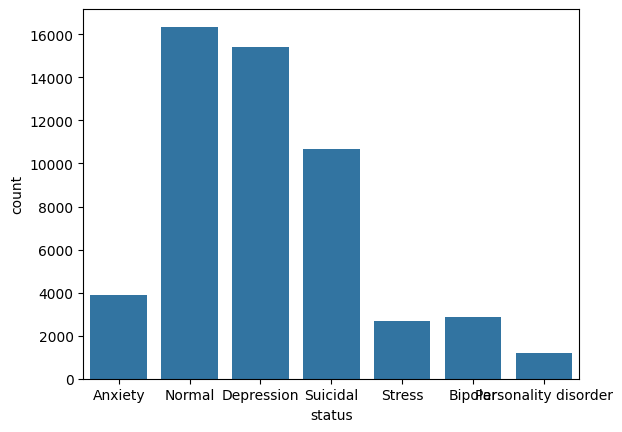

In [11]:
df.info()

sns.countplot(x='status', data=df)
plt.show()

–ü–æ—Å–∫–æ–ª—å–∫—É —Ä–∞–∑–±—Ä–æ—Å –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Å–æ–≤ –±–æ–ª—å—à–æ–π —è –±—É–¥—É —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–µ–ø—Ä–µ—Å—Å–∏—é –∏ –Ω–æ—Ä–º—É.

#### –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [12]:
# –£–¥–∞–ª—è–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è
df_depr_norm = df[df['status'].isin(['Depression', 'Normal'])].reset_index(drop=True)
df_depr_norm['statement'] = df_depr_norm['statement'].astype(str)
texts = df_depr_norm['statement'].tolist()
statuses = df_depr_norm['status'].tolist()
df_depr_norm

statement      status
0          Gr gr dreaming of ex crush to be my game, God      Normal
1                                     wkwkwk what a joke      Normal
2      Leaves are also standby in front of the PC ......      Normal
3         Thank God even though it's just a ride through      Normal
4      wedding teaser concept using the song day6 - o...      Normal
...                                                  ...         ...
31750  solutions So, when I have my real bad downs th...  Depression
31751  I‚Äôm pretty sure I‚Äôm depressed.. Ive been feeli...  Depression
31752  I can‚Äôt be bothered anymore. I‚Äôm a 22 year old...  Depression
31753  Depression feels like you‚Äôre drowning and ther...  Depression
31754  mental hospital- payment and ward logistic que...  Depression

[31755 rows x 2 columns]

In [13]:
cleaned_texts = total_slay(texts)

In [14]:
for index, text in enumerate(cleaned_texts):
    if text == "":
        statuses.pop(index)
        cleaned_texts.pop(index)

In [15]:
len(cleaned_texts)

31599

In [16]:
len(statuses)

31599

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –æ–±—É—á–∞–µ–º –Ω–∞ —Ç–µ–∫—Å—Ç–∞—Ö
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)

# –î–æ–±–∏–≤–∞–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–æ –æ–¥–Ω–æ–π –¥–ª–∏–Ω–Ω—ã
padded_sequences = pad_sequences(sequences, padding='post')

–°–æ–∑–¥–∞–¥–∏–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º

In [15]:
data = pd.DataFrame()
data['statements'] = list(padded_sequences)
data['status'] = list(statuses)
# –ü—Ä–∏–≤–æ–¥–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã–µ
data['status'] = status = LabelEncoder().fit_transform(statuses)
data # 1 - Normal, 0 - Depression

statements  status
0      [9033, 9033, 2275, 480, 1586, 493, 291, 0, 0, ...       1
1      [4406, 826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       1
2      [1698, 56, 9908, 618, 1754, 1006, 280, 183, 0,...       1
3      [300, 291, 7, 130, 1458, 0, 0, 0, 0, 0, 0, 0, ...       1
4      [1971, 5342, 2681, 729, 1217, 15520, 852, 28, ...       1
...                                                  ...     ...
31594  [3073, 207, 51, 2803, 40, 1303, 359, 483, 297,...       0
31595  [177, 142, 58, 34, 40, 157, 4, 12557, 124, 322...       0
31596  [1554, 31, 1102, 39, 144, 950, 10, 1554, 120, ...       0
31597  [14, 128, 1, 1610, 40, 1610, 235, 0, 0, 0, 0, ...       0
31598  [110, 464, 3444, 1763, 20844, 906, 1014, 110, ...       0

[31599 rows x 2 columns]

#### –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é

In [16]:
# –î–µ–ª–∏–º –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, status, test_size=0.2, shuffle=False)
print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(25279, 1845)
<class 'numpy.ndarray'>
(25279,)


In [17]:
print(len(tokenizer.word_index))

44055


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_4' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


790/790 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 19ms/step - accuracy: 0.6463 - loss: 2.8856 - val_accuracy: 0.7372 - val_loss: 2.8132 - learning_rate: 1.0000e-05
Epoch 2/30
790/790 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 13ms/step - accuracy: 0.8101 - loss: 2.5194 - val_accuracy: 0.8081 - val_loss: 2.4969 - learning_rate: 1.0000e-05
Epoch 3/30
790/790 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 13ms/step - accuracy: 0.8446 - loss: 2.3222 - val_accuracy: 0.8269 - val_loss: 2.2853 - learning_rate: 1.0000e-05
Epoch 4/30
790/790 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 13ms/step - accuracy: 0.8533 - loss: 2.1582 - val_accuracy: 0.8201 - val_loss: 2.1378 - learning_rate: 1.0000e-05
Epoch 5/30
790/790 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 13ms/step - accuracy: 0.8583 - loss: 1.9848 - val_accuracy: 0.8274 - val_loss: 1.9743 - learning_rate: 1.0000e-05
Epoch 6/30
790/790 ‚î

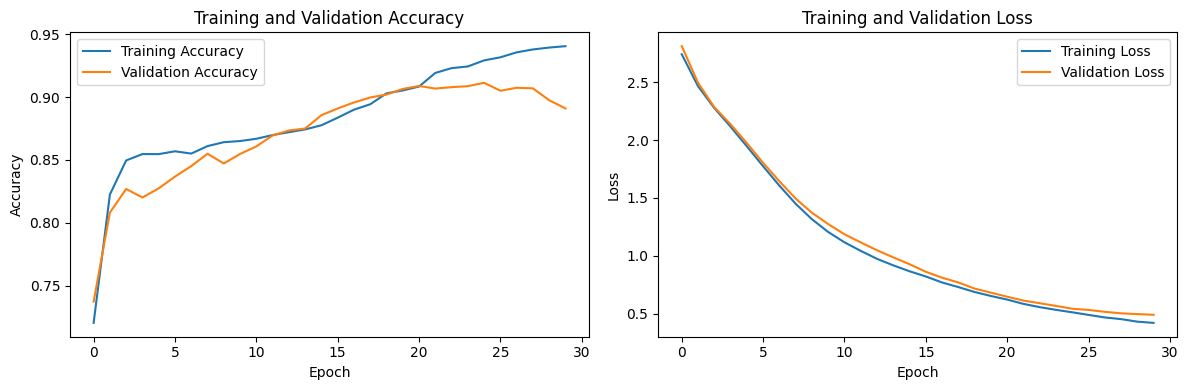

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential([
    # –°–ª–æ–π –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞
    layers.Embedding(input_dim=44055, output_dim=64, mask_zero=True),

    # –ü–µ—Ä–≤—ã–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π
    layers.Conv1D(16, 3, activation='relu', kernel_regularizer=l2(0.02)),
    layers.MaxPooling1D(2),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    # –í—Ç–æ—Ä–æ–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π
    layers.Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.02)),
    layers.MaxPooling1D(2),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    # –ü–ª—é—â–∏–º
    layers.Flatten(),

    # –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    layers.Dense(1, activation='sigmoid')
])

# –£–º–µ–Ω—å—à–∏–º –Ω–∞—á–∞–ª—å–Ω—É—é —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# –î–æ–±–∞–≤–ª—è–µ–º EarlyStopping –∏ ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞ –ø—Ä–æ–≥—Ä–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è
plt.figure(figsize=(12, 4))

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –∞–∫–∫—É—Ä–∞—Ç–Ω–æ—Å—Ç–∏ (—Ç–æ—á–Ω–æ—Å—Ç–∏) –º–æ–¥–µ–ª–∏
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

198/198 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step


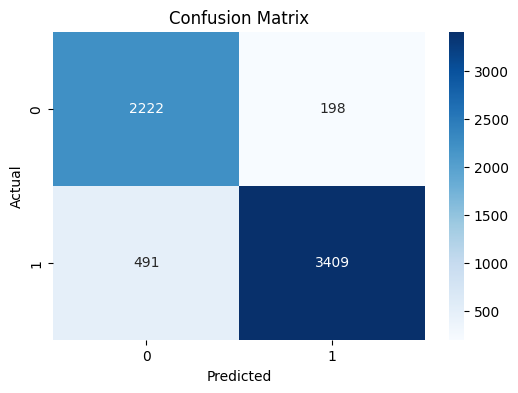


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2420
           1       0.95      0.87      0.91      3900

    accuracy                           0.89      6320
   macro avg       0.88      0.90      0.89      6320
weighted avg       0.90      0.89      0.89      6320



In [43]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# –°—Ç—Ä–æ–∏–º confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
model.save("depression_twitter.keras")

In [ ]:
model = tf.keras.models.load_model(
    "depression_twitter.keras", custom_objects=None, compile=True, safe_mode=True
)

In [ ]:
def predict_category(text):
    # –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥
    text = lemmatize_sentence(text)
    sequences = tokenizer.texts_to_sequences([text])  # –ü–µ—Ä–µ–¥–∞–µ–º —Ç–µ–∫—Å—Ç –∫–∞–∫ —Å–ø–∏—Å–æ–∫
    max_sequence_length = 1845  
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
    
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    prediction = model.predict(padded_sequences)
    
    # –£—Å—Ä–µ–¥–Ω—è–µ–º

    mean_pred = np.mean(prediction, axis=0)  # –£—Å—Ä–µ–¥–Ω—è–µ–º –ø–æ –≤—Ä–µ–º–µ–Ω–Ω—ã–º —à–∞–≥–∞–º
    if mean_pred[0].round() == 1:
        print('Prediction: Normal')
    else:
        print('Prediction: Depression')

# –¢–µ–∫—Å—Ç–∏–∫–∏ –æ—Ç –≥–µ–Ω–µ—Ä—è–ª–æ–∫

text_depr_1 = '"Another day, another coffee. Funny how the sun keeps rising even when everything feels so heavy. But hey, at least the memes are still good, right? üå•Ô∏è‚òï #JustAnotherDay'
text_depr_2 = "Me: exists Brain: Let‚Äôs overthink every life choice you‚Äôve ever made at 2 a.m. Also me: Cool, cool, cool, totally fine. üõåüí≠ #SleepIsForTheWeak"
text_norm_1 = "The sun is shining, the birds are chirping, and I‚Äôm just here vibing with my iced latte. Life‚Äôs good. üåû‚ú® #GoodVibesOnly"
text_norm_2 = "When in doubt, add glitter. Or pizza. Or both. üçï‚ú® #LifeHacks"

predict_category(text_depr_1)
predict_category(text_depr_2)
predict_category(text_norm_1)
predict_category(text_norm_2)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
Prediction: Depression
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step
Prediction: Depression
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
Prediction: Normal
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step
Prediction: Normal


### –í—ã–≤–æ–¥: 
–ù–µ–π—Ä–æ—Å–µ—Ç—å —Ä–∞–±–æ—Ç–∞–µ—Ç –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–ø–ª–æ—Ö–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ —Å–≥–µ–Ω–µ—Ä–µ–Ω–Ω—ã—Ö —Ç–≤–∏—Ç–∞—Ö —Å–æ —Å–∫—Ä—ã—Ç–æ–π –¥–µ–ø—Ä–µ—Å—Å–∏–µ–π
### P.S.
–≠—Ç–æ –±—ã–ª–æ *—Å–ª–æ–∂–Ω–æ*. –ü–æ–ø—Ä–æ–±—É—é –ø–æ—Ç–æ–º –¥–æ–æ–±—É—á–∏—Ç—å –Ω–∞ –±–æ–ª—å—à–µ –∫–ª–∞—Å—Å–æ–≤